In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [45]:
X, y = make_classification(
    n_samples=1800,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42,
    n_clusters_per_class=1,
    n_repeated=0
)

X = pd.DataFrame(X)
X.head()

,0,1
0,1.117993,0.712935
1,1.276011,0.692063
2,1.153495,-1.138302
3,2.174094,-0.544317
4,0.796614,-1.236184


In [46]:
X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X)

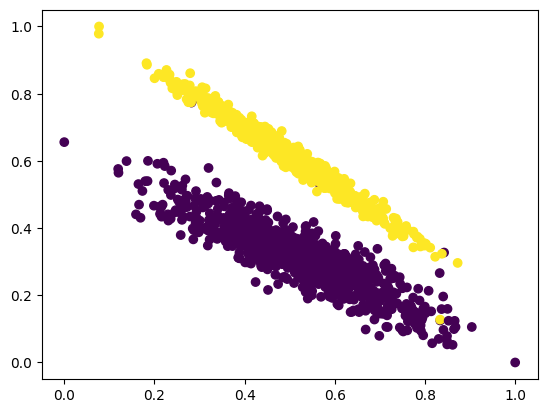

In [47]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.3)
x_test.head()

,0,1
1591,0.433965,0.308526
943,0.528785,0.612992
869,0.604608,0.229079
162,0.387834,0.692913
1271,0.422700,0.673147


In [49]:
def euclidianDistance(x1, x2, y1, y2):
    dist = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    return dist

In [50]:
def calcPointDistance(x_test, x_train):
    distance = []
    for i in range(len(x_test)):
        temp = []
        for j in range(len(x_train)):
            temp.append(euclidianDistance(x_test.iloc[i, 0], x_train.iloc[j, 0], x_test.iloc[i, 1], x_train.iloc[j, 1]))
        distance.append(temp)
    return distance
distance = calcPointDistance(x_test, x_train)
distance = pd.DataFrame(distance)
distance

,0,1,2,3,4,5,6,7,8,9,...,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259
0,0.126368,0.277621,0.096002,0.092289,0.277613,0.327955,0.514092,0.075420,0.103211,0.266990,...,0.239957,0.088551,0.313078,0.270602,0.231189,0.073191,0.054297,0.266847,0.088418,0.368773
1,0.302872,0.280601,0.277760,0.261130,0.041304,0.319956,0.298419,0.277282,0.328685,0.092431,...,0.426074,0.282362,0.054103,0.048290,0.346430,0.323564,0.318386,0.174816,0.281114,0.148756
2,0.313182,0.453706,0.131996,0.152134,0.354838,0.214992,0.651322,0.147506,0.089429,0.306232,...,0.051792,0.132498,0.410802,0.349368,0.418828,0.117049,0.135900,0.251533,0.133775,0.493398
3,0.315016,0.208795,0.383490,0.363751,0.176785,0.477820,0.142174,0.374513,0.434022,0.246923,...,0.554359,0.385390,0.114353,0.179079,0.305469,0.419261,0.407831,0.331249,0.384038,0.018740
4,0.304126,0.217717,0.353390,0.334015,0.138046,0.438489,0.179870,0.345973,0.404495,0.207642,...,0.520880,0.355839,0.075355,0.140806,0.308269,0.391548,0.381277,0.291987,0.354492,0.029157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.221772,0.348291,0.022304,0.041145,0.250089,0.215696,0.539413,0.043657,0.041879,0.211718,...,0.159120,0.026827,0.302668,0.244070,0.326575,0.053414,0.064720,0.180089,0.027604,0.382072
536,0.480917,0.335021,0.580812,0.560820,0.373859,0.671729,0.059839,0.570228,0.630493,0.442088,...,0.753952,0.582145,0.311303,0.376963,0.435239,0.613618,0.600711,0.526029,0.580796,0.218232
537,0.287939,0.298530,0.227577,0.212739,0.042503,0.262191,0.355515,0.230253,0.277221,0.032242,...,0.367568,0.232994,0.101845,0.043985,0.348708,0.275472,0.272676,0.115931,0.231827,0.200749
538,0.345584,0.228744,0.419428,0.399673,0.210114,0.510223,0.107799,0.410338,0.469919,0.279505,...,0.590187,0.421297,0.147420,0.212849,0.328353,0.454972,0.443371,0.363820,0.419945,0.054647


In [51]:
def calDist(x_test, x_train):
    return x_test.apply(lambda x: np.sqrt((x_train - x)**2).sum(axis=1))
newDistance = calDist(x_test.T, x_train).T
newDistance

,522,513,81,704,380,1524,84,1514,1665,914,...,121,1638,1044,1724,1095,1130,1294,860,1459,1126
1591,0.176543,0.389938,0.118927,0.124981,0.348538,0.395154,0.630088,0.098212,0.124513,0.368430,...,0.320212,0.107961,0.351418,0.339159,0.317348,0.089101,0.064313,0.375615,0.108749,0.406916
943,0.427044,0.353508,0.280359,0.274305,0.050748,0.452467,0.420442,0.301074,0.334158,0.127023,...,0.529857,0.291325,0.059690,0.060127,0.477941,0.346610,0.357331,0.246092,0.290537,0.197270
869,0.426632,0.640027,0.184599,0.212481,0.430807,0.303958,0.880177,0.208487,0.125576,0.332712,...,0.070122,0.186629,0.519424,0.427352,0.567437,0.160989,0.185776,0.284419,0.188371,0.657005
162,0.366015,0.292479,0.496008,0.468126,0.249800,0.673340,0.199570,0.472120,0.555031,0.347895,...,0.750729,0.493978,0.161183,0.253255,0.416912,0.519619,0.494831,0.466964,0.492236,0.023602
1271,0.381114,0.307578,0.441376,0.413494,0.195167,0.618707,0.254202,0.417488,0.500398,0.293263,...,0.696097,0.439345,0.106550,0.198622,0.432011,0.464986,0.440198,0.412332,0.437604,0.031030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.272265,0.485660,0.030231,0.058113,0.276440,0.267229,0.725810,0.054120,0.051758,0.240505,...,0.224490,0.032262,0.365057,0.272985,0.413070,0.075249,0.085970,0.247690,0.034003,0.502638
1569,0.530600,0.351935,0.772634,0.744752,0.526425,0.949965,0.077055,0.748746,0.831656,0.624520,...,1.027355,0.770603,0.437808,0.529880,0.476368,0.796244,0.771456,0.743590,0.768862,0.300228
118,0.404244,0.330708,0.257559,0.251505,0.053216,0.370324,0.502585,0.278274,0.300318,0.044880,...,0.447714,0.268525,0.141833,0.049761,0.455140,0.323809,0.334531,0.163949,0.267736,0.279413
1795,0.384886,0.311350,0.543231,0.515349,0.297022,0.720562,0.152347,0.519343,0.602253,0.395118,...,0.797952,0.541200,0.208405,0.300477,0.435782,0.566841,0.542053,0.514187,0.539459,0.070825


In [52]:
def commbineCategory(newDistance):
    combinedDf = []
    for i in range(newDistance.shape[0]):
        temp = []
        for j in range(newDistance.shape[1]):
            temp.append((newDistance.iloc[i,j], y_train[j]))
            temp.sort(key=lambda x: x[0])
        combinedDf.append(temp)
    return combinedDf
combinedDf = commbineCategory(newDistance)
combinedDf = pd.DataFrame(combinedDf)
combinedDf

,0,1,2,3,4,5,6,7,8,9,...,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259
0,"(0.0034662909858142466, 0)","(0.010059813608271517, 0)","(0.01112787490049838, 0)","(0.013661516277826802, 0)","(0.014471781975776032, 0)","(0.015064960301620967, 0)","(0.01609328697180673, 0)","(0.017945268219588695, 0)","(0.020581023564611, 0)","(0.021296868832431537, 0)",...,"(0.7396601217476624, 1)","(0.7446870003531681, 1)","(0.7545899528244715, 1)","(0.7711018984604225, 1)","(0.7750659147879229, 1)","(0.7812583122381797, 0)","(0.8281233384714614, 1)","(0.8745611198049149, 0)","(1.0273864117998674, 1)","(1.0482911853815828, 1)"
1,"(0.006647875587094343, 1)","(0.008725009098035641, 1)","(0.00877043946291467, 1)","(0.011561264563685558, 1)","(0.012776780419740286, 1)","(0.014137119416238408, 1)","(0.014367967044323304, 1)","(0.014541674983254649, 1)","(0.014668685139057613, 1)","(0.01532430372900917, 1)",...,"(0.81774116097667, 1)","(0.8281212614538678, 0)","(0.8386459345583854, 1)","(0.8445596108844199, 0)","(0.8463514063284359, 0)","(0.854229598382334, 0)","(0.867054821370153, 0)","(0.8795500690789158, 0)","(0.8929966121979704, 0)","(1.0842063706281122, 0)"
2,"(0.01041935825623741, 0)","(0.013851006606773214, 0)","(0.014056400938125463, 0)","(0.015794952190651135, 0)","(0.016957159280260287, 0)","(0.02040776182895357, 0)","(0.021090651936578997, 0)","(0.026584202495546938, 0)","(0.027702091838197856, 0)","(0.028654393021551816, 0)",...,"(0.9724196113641903, 1)","(0.9897493583206396, 1)","(0.9947762369261454, 1)","(1.0046791893974487, 1)","(1.0211911350333998, 1)","(1.0251551513609, 1)","(1.0313475488111568, 0)","(1.0782125750444385, 1)","(1.2774756483728447, 1)","(1.29838042195456, 1)"
3,"(0.003048298080736589, 1)","(0.006245609964070864, 1)","(0.007091649244388043, 1)","(0.008385489173634575, 1)","(0.008792574542427878, 1)","(0.013020051259639231, 1)","(0.015837268688274064, 1)","(0.01603744923986189, 1)","(0.016528499996585677, 1)","(0.016849237499417802, 1)",...,"(1.0136531927826533, 0)","(1.0332889593921069, 0)","(1.0489939060286948, 0)","(1.0654322554592468, 0)","(1.0672240509032629, 0)","(1.075102242957161, 0)","(1.08792746594498, 0)","(1.1004227136537426, 0)","(1.1138692567727972, 0)","(1.3050790152029392, 0)"
4,"(0.0012125491048394221, 1)","(0.006075483492523848, 1)","(0.0076603527796764714, 1)","(0.007668509534699719, 1)","(0.009422156301966467, 1)","(0.009911330684080899, 1)","(0.010055064556832138, 1)","(0.010530706827704406, 1)","(0.0106896665375813, 1)","(0.012298350953248438, 1)",...,"(0.9590205847211796, 0)","(0.9786563513306332, 0)","(0.9943612979672211, 0)","(1.0107996473977732, 0)","(1.012591442841789, 0)","(1.0204696348956874, 0)","(1.0332948578835062, 0)","(1.045790105592269, 0)","(1.0592366487113236, 0)","(1.2504464071414656, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,"(0.002815448914357588, 0)","(0.007136979219698025, 0)","(0.013001395155305961, 0)","(0.015305112950558919, 0)","(0.0156978108239042, 0)","(0.015825737280709018, 0)","(0.016158068376298074, 0)","(0.017393682958485868, 0)","(0.019472424577495318, 0)","(0.022658243492014007, 0)",...,"(0.8180522718783516, 1)","(0.8353820188348009, 1)","(0.8404088974403067, 1)","(0.85031184991161, 1)","(0.8668237955475611, 1)","(0.8707878118750614, 1)","(0.8769802093253182, 0)","(0.9238452355585999, 1)","(1.123108308887006, 1)","(1.1440130824687214, 1)"
536,"(0.043369846993190964, 1)","(0.0470604332514562, 1)","(0.05993050404966377, 1)","(0.06011956899976095, 1)","(0.06174367392343444, 1)","(0.06254354398014517, 1)","(0.06462314540799746, 1)","(0.06463606063835761, 1)","(0.06481139609342401, 1)","(0.06563960834178734, 1)",...,"(1.290278476906389, 0)","(1.3099142435158426, 0)","(1.3256191901524306, 0)","(1.3420575395829826, 0)","(1.3438493350269987, 0)","(1.3517275270808968, 0)","(1.3645527500687158, 0)","(1.3770479977774783, 0)","(1.390494540896533, 0)","(1.581704299326675, 0)"
537,"(0.003178767606267341, 1)","(0.0037246950400972

In [53]:
k = int(input("Enter the value of k: "))

def findCategory(k):
    category = []
    for i in range(len(combinedDf)):
        zeros = 0
        ones = 0
        for j in range(k):
            if combinedDf.iloc[i, j][1] == 0:
                zeros += 1
            else: ones += 1
        if zeros > ones:
            category.append(0)
        else: category.append(1)
    return category
categories = findCategory(k)
categories[:5]



[0, 1, 0, 1, 1]

In [54]:
accuracy_score(y_test, categories) * 100

99.44444444444444

In [55]:
knn = KNeighborsClassifier().fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred) * 100

99.44444444444444